In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
from astropy.stats import RipleysKEstimator

In [9]:
# Create a random distribution of points in 2-dimensional space
rng = np.random.default_rng()
# 100 points in a 2-dimensional space using a poisson distribution
data = rng.poisson(lam=100, size=(100,2))
data2 = rng.random((100, 2))


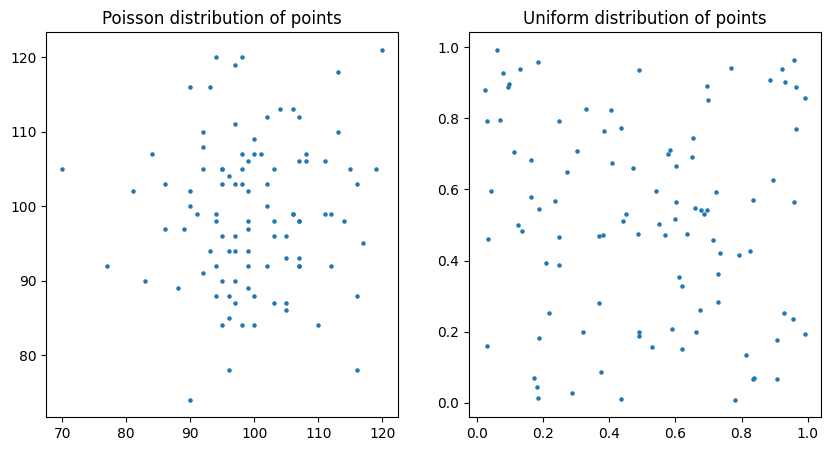

In [10]:
#show the points
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax.scatter(data[:,0], data[:,1], s=5)
ax.set_title('Poisson distribution of points')
ax2.scatter(data2[:,0], data2[:,1], s=5)
ax2.set_title('Uniform distribution of points')
plt.show()

2350


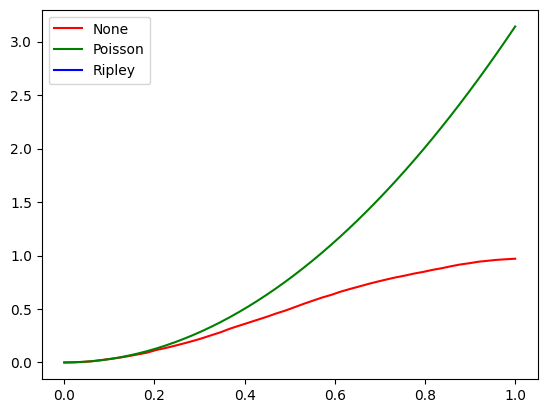

In [21]:
r = np.linspace(0, 1, 50)
xmax = max(data[:,0])
xmin = min(data[:,0])
ymax = max(data[:,1])
ymin = min(data[:,1])

area = (xmax - xmin) * (ymax - ymin)
print(area)
# total distance between all points n * (n-1) / 2
#Kest = RipleysKEstimator(area=int(area), x_max=int(xmax), y_max=int(ymax), x_min=int(xmin), y_min=int(ymin))

Kest = RipleysKEstimator(area=1, x_max=1, y_max=1, x_min=1, y_min=1)
plt.plot(r, Kest(data=data2, radii=r, mode='none'), color='red', label='None')
plt.plot(r, Kest.poisson(r), color='green', label='Poisson')
plt.plot(r, Kest(data=data2, radii=r, mode='ripley'), color='blue', label='Ripley')
plt.legend()
plt.show()

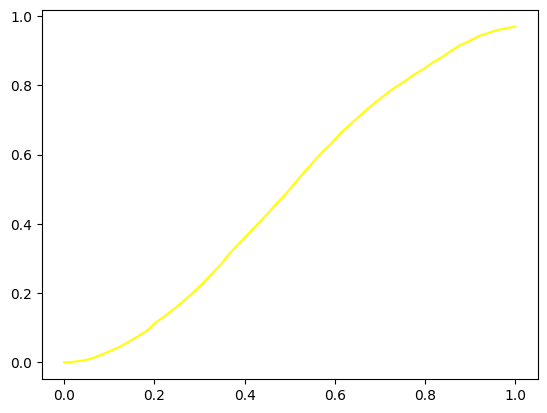

In [22]:
# define radius of the search circles
r = np.linspace(0, 1, 50)

# calculate the pairwise distances between all points
""" def diff(data):
    npts = np.shape(data)[0]
    diff = np.zeros(shape = (npts*(npts-1)//2,2)) # pre-allocate array, total number of distances is n(n-1)/2
    k = 0
    for i in range(npts - 1): # loop over all points except the last one
        size = npts - i - 1 # number of distances for this point
        diff[k:k + size] = abs(data[i] - data[i+1:]) # calculate the difference between the point and all points after it
        k += size
    distances = np.hypot(diff[:,0], diff[:,1])                      # Pythagorean Theorem (a^2+b^2=c^2)
    return distances """

def distances(data):
    npts = np.shape(data)[0]
    distances = []
    for i in range(npts):
        for j in range(i+1, npts):
            distances.append(math.dist(data[i], data[j]))
    return distances

# calculate the ripleys K 
def ripleyK(area, data, radii):
    npts = np.shape(data)[0]
    K = np.zeros_like(radii)
    for i in range(len(radii)):
        K[i] = np.sum(distances(data) < radii[i])
    K = area * 2 * K / (npts * (npts - 1))
    return K

Kt = ripleyK(1, data2, r)
plt.plot(r, Kt, color = 'yellow', label='KCalc')